In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [14]:
transac = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions',skiprows=1)
new_cust = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'NewCustomerList',skiprows=1)
cust_demog = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic',skiprows=1)
cust_addrs = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress',skiprows=1)

###### Customer Address

Dataset is complete and has no potential issues

In [59]:
print('Duplicated entries for customers in the data = {} '.format(cust_addrs.duplicated().sum()))

cust_addrs.info()

Duplicated entries for customers in the data = 0 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


##### New Customer

Issues

    - 5 Unknown columns out of which one column is duplictae of Rank 
    - Gender category has 'U' - does it mean unknown?
    - Imputation for DOB can be done by converting it to date and taking info from Job title and sector
    - Imputation for Job title is bid tedius but can use Age,Purchases made and Wealth to impute Job sector. Same approach can   used for job title.

In [60]:
new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

No duplicate entries for customers

In [72]:
new_cust.duplicated().sum()

0

In [84]:
new_cust.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

Age distribution looks fair enough

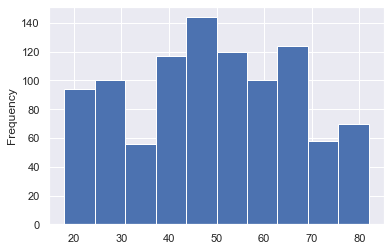

In [73]:
Age = 2020 - new_cust.DOB.dt.year

Age.plot.hist()

Null Values in DOB can be imputed by taking mean age of Job title. [ We have 17 NA and for this we have 16 corresponding values with Job title & 1 with DOB and Job industry ]

To impute Job title and Job description 

In [74]:
new_cust.loc[new_cust.DOB.isna(),]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.43,0.4300,0.430000,0.365500,57,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,...,NSW,Australia,9,1.09,1.3625,1.703125,1.703125,226,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,...,VIC,Australia,3,0.55,0.6875,0.687500,0.584375,324,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,...,QLD,Australia,8,0.51,0.5100,0.510000,0.510000,358,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,...,VIC,Australia,7,0.47,0.5875,0.587500,0.499375,361,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,...,QLD,Australia,6,0.79,0.7900,0.790000,0.671500,375,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,...,VIC,Australia,5,0.76,0.7600,0.760000,0.646000,433,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,...,VIC,Australia,6,0.74,0.9250,1.156250,0.982812,436,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,...,NSW,Australia,7,0.87,0.8700,0.870000,0.739500,575,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,...,NSW,Australia,11,0.81,0.8100,1.012500,1.012500,599,599,0.775000


In [67]:
new_cust.loc[(new_cust.DOB.isna()) & (new_cust.job_title.isna()),]


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
883,Shara,Bramhill,U,24,NaT,NaN,IT,Affluent Customer,N,No,...,NSW,Australia,10,0.45,0.45,0.5625,0.5625,883,883,0.53125


##### Transactions

Issues

    - Product first sold date format
    - For 197 entries no brand, product and cost information
    - Online order imputation startegy unknown

In [90]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### Customer demographics

    -Outlier for DOB - Aged 177
    -Default column has ambiguous encoding 
    -Gender 'u' meaning
    -Tenure is imp column and difficult to impute from information given
    - Imputation fro DOB and Job details same as new customer data

In [101]:
cust_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

177.0

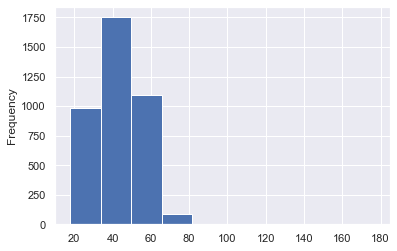

In [106]:
Age  = 2020 - cust_demog.DOB.dt.year
Age.plot.hist()
Age.max()

In [107]:
cust_demog.default

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [116]:
cust_demog[cust_demog.tenure.isna()]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,NaN,No,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,NaN,Yes,NaN
266,267,Edgar,Buckler,U,53,NaT,NaN,IT,High Net Worth,N,NaN,No,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,NaN,No,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3779,Ulick,Daspar,U,68,NaT,NaN,IT,Affluent Customer,N,NaN,No,NaN
3882,3883,Nissa,Conrad,U,35,NaT,Legal Assistant,IT,Mass Customer,N,NaN,No,NaN
3930,3931,Kylie,Epine,U,19,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN
3934,3935,Teodor,Alfonsini,U,72,NaT,NaN,IT,High Net Worth,N,NaN,Yes,NaN


In [117]:
cust_demog.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [120]:
cust_demog.min()

customer_id                                              1
first_name                                          Aarika
gender                                                   F
past_3_years_bike_related_purchases                      0
DOB                                    1843-12-21 00:00:00
wealth_segment                           Affluent Customer
deceased_indicator                                       N
owns_car                                                No
tenure                                                   1
dtype: object

In [126]:
a = set(cust_addrs.customer_id.unique())

In [128]:
b = set(transac.customer_id.unique())

In [127]:
c = set(cust_demog.customer_id.unique())

Customer Ids that are present in one table and not in other

In [134]:
b - a

{3, 10, 22, 23, 5034}

In [135]:
c - a 

{3, 10, 22, 23}

In [144]:
len(c - a)

4